# CS 122 ML Project
Fall 2020  
Codey Phoun

Objective: 

1. Explore the dataset with 5 different visualizations
2. Train and test 4 different ML models on the data

Data from: \
Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
# read in the data
data_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/heart_disease_clinical_data.csv"
heart_data = pd.read_csv(data_url)
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Data Exploration

In [3]:
# check for NA
heart_data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# view data types
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


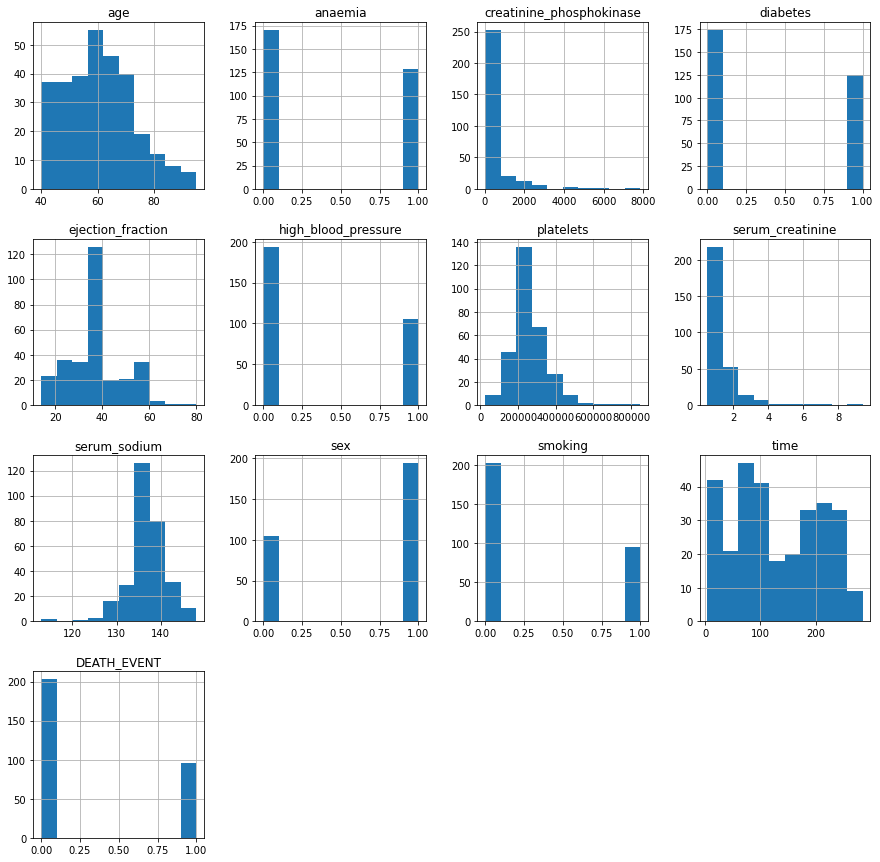

In [6]:
# view data distribution
heart_data.hist(figsize=(15,15));

## Create a test set and a training set

In [7]:
# create age categories/bins for the stratfied split of train and test data
heart_data["age_cat"] = pd.cut(heart_data["age"],
                              bins=[39, 49, 59, 69, 79, np.inf])

In [8]:
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_cat
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(69.0, 79.0]"
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(49.0, 59.0]"
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(59.0, 69.0]"
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(49.0, 59.0]"
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(59.0, 69.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,"(59.0, 69.0]"
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,"(49.0, 59.0]"
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,"(39.0, 49.0]"
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,"(39.0, 49.0]"


In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 20)

for train_index, test_index in split.split(heart_data, heart_data["age_cat"]):
    heart_train_set = heart_data.loc[train_index]
    heart_test_set = heart_data.loc[test_index]

In [10]:
# code modified from Dr. Lee Lecture 15
def age_cat_proportions(data):
    return data["age_cat"].value_counts() / len(data)

rand_train_set, rand_test_set = train_test_split(heart_data, test_size = 0.2, random_state = 20)

compare_props = pd.DataFrame({
    "Overall": age_cat_proportions(heart_data),
    "Stratified": age_cat_proportions(heart_train_set),
    "Random": age_cat_proportions(rand_train_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [11]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
"(39.0, 49.0]",0.157191,0.158996,0.150628,-4.175198,1.148402
"(49.0, 59.0]",0.274247,0.271967,0.288703,5.270946,-0.831718
"(59.0, 69.0]",0.311037,0.309623,0.309623,-0.454402,-0.454402
"(69.0, 79.0]",0.173913,0.175732,0.171548,-1.359833,1.046025
"(79.0, inf]",0.083612,0.083682,0.079498,-4.920502,0.083682


In [12]:
heart_train_set.shape

(239, 14)

In [13]:
heart_test_set.shape

(60, 14)

In [14]:
# replace binary categorical variables with words for visualization
heart_data_cat = heart_train_set.copy()
heart_data_cat["anaemia"].replace({ 0 : "False", 1 : "True"}, inplace = True)
heart_data_cat["high_blood_pressure"].replace({ 0 : "False", 1 : "True"}, inplace = True)
heart_data_cat["diabetes"].replace({ 0 : "False", 1 : "True"}, inplace = True)
heart_data_cat["smoking"].replace({ 0 : "False", 1 : "True"}, inplace = True)
heart_data_cat["sex"].replace({ 0 : "Female", 1 : "Male"}, inplace = True)
heart_data_cat["DEATH_EVENT"].replace({ 0 : "Survived", 1 : "Died"}, inplace = True)

In [15]:
heart_data_cat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_cat
216,70.0,False,1202,False,50,True,358000.0,0.9,141,Female,False,196,Survived,"(69.0, 79.0]"
59,72.0,False,364,True,20,True,254000.0,1.3,136,Male,True,59,Died,"(69.0, 79.0]"
223,47.0,False,582,False,25,False,130000.0,0.8,134,Male,False,201,Survived,"(39.0, 49.0]"
124,60.0,False,582,False,40,False,217000.0,3.7,134,Male,False,96,Died,"(59.0, 69.0]"
41,50.0,False,124,True,30,True,153000.0,1.2,136,Female,True,32,Died,"(49.0, 59.0]"


In [16]:
categorical_features = ["anaemia", "high_blood_pressure", "diabetes", "smoking", "sex", "DEATH_EVENT"]
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "DEATH_EVENT"]

## Data Visualization

### 1. What is the distribution of the age and sex among the outcome of the patients in the data?

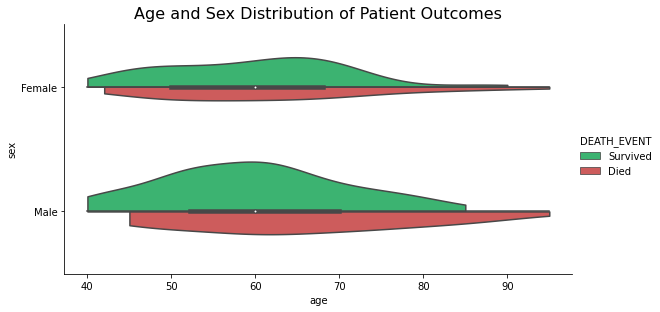

In [17]:
color_palette = {"Died" : "indianred", "Survived": "mediumseagreen"}

sns.catplot(x = "age", 
            y = "sex", 
            data = heart_data_cat,
            split = True,
            kind = "violin",
            hue = "DEATH_EVENT",
            cut = 0,
            scale = "count",
            scale_hue = False,
            aspect = 2,
            height = 4,
            palette = color_palette,
            saturation = 1);

plt.title("Age and Sex Distribution of Patient Outcomes", fontsize = 16);

The plot shows that in the dataset, there are more males than females overall. Patients at the lowest ages for both sexes survived, but the oldest patients of both groups did not. A small count of female patients in their late 80s to 90 survived, but the male patients who survived were about age 85. Of the patients who died, the youngest occurred in females in their low 40s. Male patients did not start dying until the mid 40s in the data.

### 2. How well do the two most relevant features identified by the paper separate between the patient outcomes?

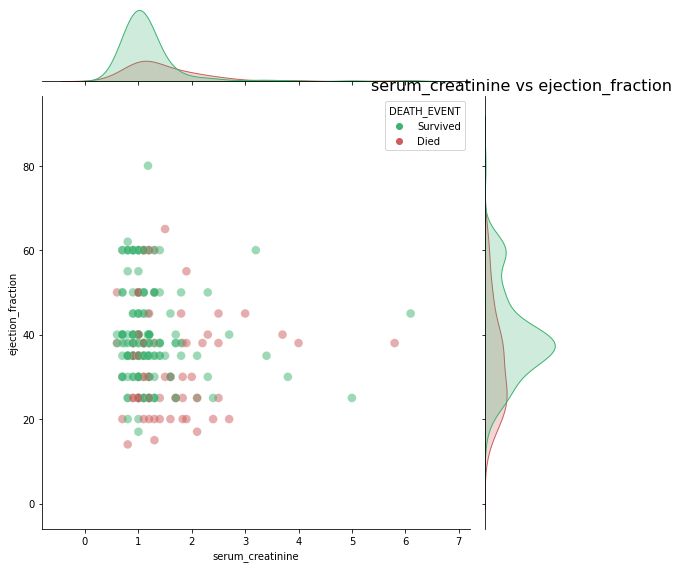

In [18]:
sns.jointplot(data = heart_data_cat,
               x = "serum_creatinine",
               y = "ejection_fraction",
               hue = "DEATH_EVENT",
               palette = color_palette,
               joint_kws={"s":75,"linewidth" : 0.2,"alpha" : 0.5 },
               kind = "scatter",
               height = 8)

There is no clear separation between patient outcomes with these two variables, but higher serum_creatinine values and lower ejection_fraction values appear to be associated with lower patient survivability.

### 3. What other pairwise numerical features show a relationship with patient outcome?

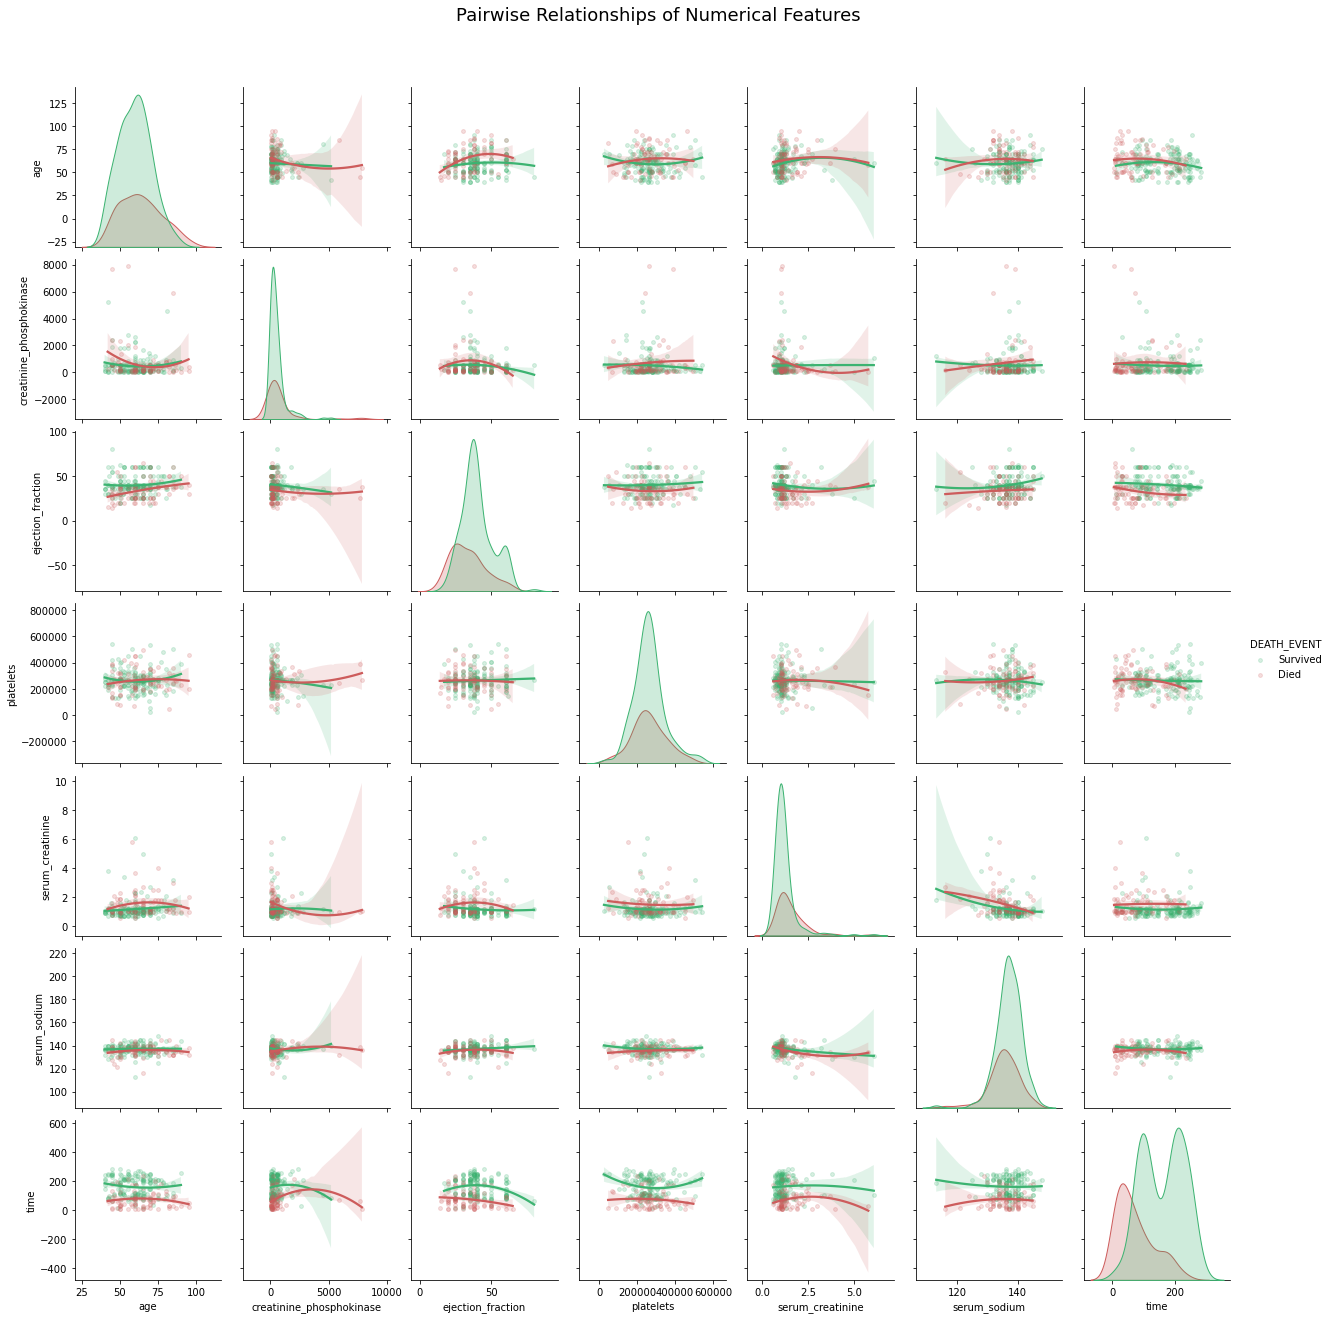

In [19]:
Q3 = sns.pairplot(data = heart_data_cat[numerical_features],
             hue = "DEATH_EVENT",
             kind = "reg",
             palette = color_palette,
             plot_kws = {"scatter_kws":{"alpha":0.2, "s":15}, "order":2});

Q3.fig.suptitle("Pairwise Relationships of Numerical Features",
                fontsize = 18,
                y=1.05);

The time variable shows some separation in outcomes with several of the other numerical features. The time histogram at the bottom right also shows most patients who died had a shorter follow-up time.

### 4. What categorical features may have a strong influence on patient outcome?

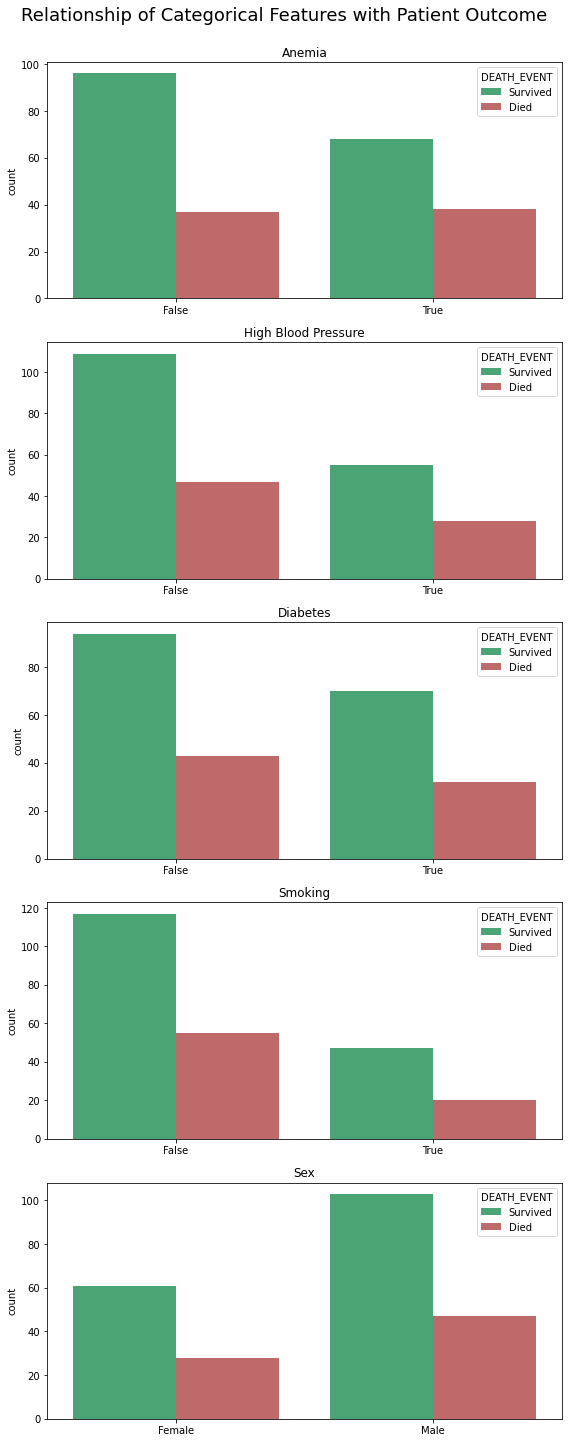

In [20]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))
fig.suptitle('Relationship of Categorical Features with Patient Outcome', 
             fontsize = 18, y = 1)

sns.countplot(ax=axes[0], data = heart_data_cat, 
              x = "anaemia", 
              hue = "DEATH_EVENT",
              palette = color_palette)
axes[0].set_title('Anemia')
axes[0].set_xlabel("")

sns.countplot(ax=axes[1], data = heart_data_cat, 
              x = "high_blood_pressure", 
              hue = "DEATH_EVENT",
              palette = color_palette, order = ["False", "True"])
axes[1].set_title('High Blood Pressure')
axes[1].set_xlabel("")

sns.countplot(ax=axes[2], data = heart_data_cat, 
              x = "diabetes", 
              hue = "DEATH_EVENT",
              palette = color_palette)
axes[2].set_title('Diabetes')
axes[2].set_xlabel("")

sns.countplot(ax=axes[3], data = heart_data_cat, 
              x = "smoking", 
              hue = "DEATH_EVENT",
              palette = color_palette)
axes[3].set_title('Smoking')
axes[3].set_xlabel("")

sns.countplot(ax=axes[4], data = heart_data_cat, 
              x = "sex", 
              hue = "DEATH_EVENT",
              palette = color_palette)
axes[4].set_title('Sex')
axes[4].set_xlabel("")
plt.tight_layout();

The most influential categorical variables appear to be anemia, high blood pressure, and diabetes. Patients without anemia, high blood pressure, or diabetes appear to have a higher chance of survival. The smoking and sex variables appear to show less influence on patient outcome.

### 5. What features have the highest Pearson Correlation Coefficient with patient outcome?

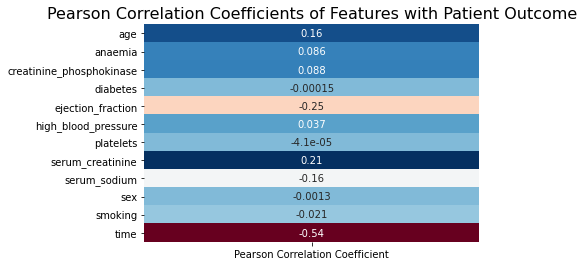

In [21]:
corr_matrix = heart_train_set.corr()
outcome_corr = pd.DataFrame(corr_matrix["DEATH_EVENT"], index=corr_matrix.columns)
outcome_corr.rename(columns = {"DEATH_EVENT":"Pearson Correlation Coefficient"}, inplace = True)
outcome_corr.drop("DEATH_EVENT", inplace = True)
sns.heatmap(outcome_corr, cmap='RdBu', annot=True, cbar = False)
plt.title("Pearson Correlation Coefficients of Features with Patient Outcome", fontsize = 16);

The features age, ejection fraction, serum_creatinine, and time have the largest absolute Pearson Correlation Coefficients with patient outcome. The diabetes and platelets features have the smallest absolute Pearson Correlation Coefficient with patient outcome.

## Transform Data

In [22]:
for set_ in (heart_train_set, heart_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [23]:
categorical_features = ["anaemia", 
                        "high_blood_pressure", 
                        "diabetes", 
                        "smoking", 
                        "sex"]

numerical_features = ["age", 
                      "creatinine_phosphokinase", 
                      "ejection_fraction", 
                      "platelets", 
                      "serum_creatinine", 
                      "serum_sodium", 
                      "time"]


heart_train_labels = heart_train_set["DEATH_EVENT"].copy()
heart_train_set.drop("DEATH_EVENT", axis=1, inplace = True)

In [24]:
#num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_pipeline = Pipeline([('mm_scaler', MinMaxScaler())])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features)],
        remainder = 'passthrough')

heart_train_set_processed = full_pipeline.fit_transform(heart_train_set)

heart_train_set_processed

array([[0.54545455, 0.15042103, 0.54545455, ..., 1.        , 0.        ,
        0.        ],
       [0.58181818, 0.043506  , 0.09090909, ..., 1.        , 1.        ,
        1.        ],
       [0.12727273, 0.07131921, 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.36363636, 0.03023731, 0.36363636, ..., 0.        , 0.        ,
        1.        ],
       [0.45454545, 0.01428936, 0.31818182, ..., 1.        , 1.        ,
        0.        ],
       [0.74545455, 0.57629497, 0.31818182, ..., 0.        , 1.        ,
        1.        ]])

In [25]:
len(heart_train_set_processed[0])

12

## Fit and Train ML Models on Training Data

In [26]:
# logisitic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 20, solver ='lbfgs')
lr_model.fit(heart_train_set_processed, heart_train_labels)

from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr_model, heart_train_set_processed, heart_train_labels, cv = 10)
lr_scores

array([0.83333333, 0.83333333, 0.83333333, 0.91666667, 0.79166667,
       0.79166667, 0.70833333, 0.75      , 0.79166667, 0.91304348])

In [27]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 20)
dt_model.fit(heart_train_set_processed, heart_train_labels)
dt_scores = cross_val_score(dt_model, heart_train_set_processed, heart_train_labels, cv = 10)
dt_scores

array([0.75      , 0.83333333, 0.75      , 0.79166667, 0.875     ,
       0.75      , 0.66666667, 0.83333333, 0.79166667, 0.82608696])

In [28]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 20)
rf_model.fit(heart_train_set_processed, heart_train_labels)
rf_scores = cross_val_score(rf_model, heart_train_set_processed, heart_train_labels, cv = 10)
rf_scores

array([0.79166667, 0.875     , 0.95833333, 0.875     , 0.83333333,
       0.83333333, 0.79166667, 0.79166667, 0.79166667, 0.91304348])

In [29]:
# support vector machine
from sklearn import svm
sv_model = svm.SVC(random_state = 20)
sv_model.fit(heart_train_set_processed, heart_train_labels)
sv_scores = cross_val_score(sv_model, heart_train_set_processed, heart_train_labels, cv = 10)
sv_scores

array([0.875     , 0.75      , 0.83333333, 0.83333333, 0.70833333,
       0.75      , 0.75      , 0.70833333, 0.58333333, 0.91304348])

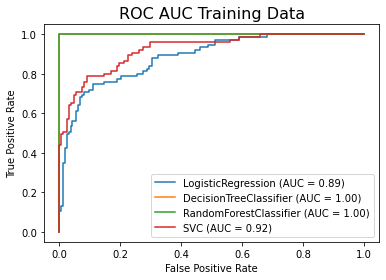

In [30]:
from sklearn.metrics import plot_roc_curve
lr_plot = plot_roc_curve(lr_model, heart_train_set_processed, heart_train_labels)
plot_roc_curve(dt_model, heart_train_set_processed, heart_train_labels, ax=lr_plot.ax_)
plot_roc_curve(rf_model, heart_train_set_processed, heart_train_labels, ax=lr_plot.ax_)
plot_roc_curve(sv_model, heart_train_set_processed, heart_train_labels, ax=lr_plot.ax_)
plt.title("ROC AUC Training Data", fontsize = 16);
plt.show()

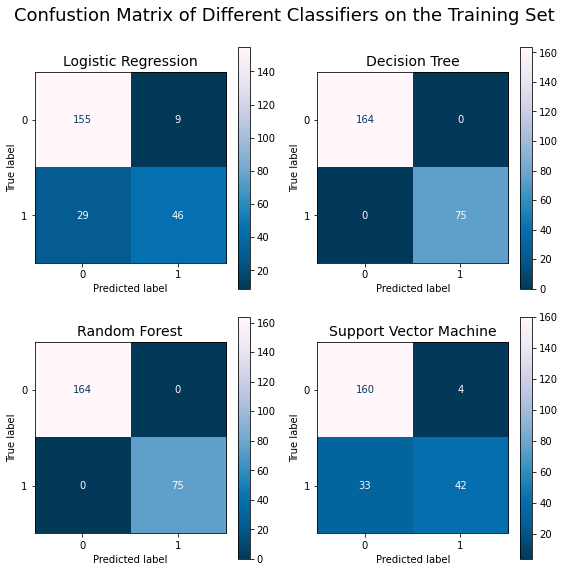

In [31]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Confusion Matrix of Different Classifiers on the Training Set', 
             fontsize = 18, y = 1)

plot_confusion_matrix(lr_model, heart_train_set_processed, heart_train_labels, ax=axes[0,0], cmap = "PuBu_r")
axes[0,0].set_title('Logistic Regression', fontsize = 14)

plot_confusion_matrix(dt_model, heart_train_set_processed, heart_train_labels, ax=axes[0,1], cmap = "PuBu_r")
axes[0,1].set_title('Decision Tree', fontsize = 14)

plot_confusion_matrix(rf_model, heart_train_set_processed, heart_train_labels, ax=axes[1,0], cmap = "PuBu_r")
axes[1,0].set_title('Random Forest', fontsize = 14)

plot_confusion_matrix(sv_model, heart_train_set_processed, heart_train_labels, ax=axes[1,1], cmap = "PuBu_r")
axes[1,1].set_title('Support Vector Machine', fontsize = 14)
plt.tight_layout();

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params = {
        'n_estimators': randint(low = 100, high = 1000),
        'max_features': randint(low = 1, high = 6),
        'min_samples_split': randint(low = 2, high = 12)
         }

rf_model = RandomForestClassifier()
rnd_search = RandomizedSearchCV(rf_model, 
                                param_distributions = params,
                                n_iter = 250, cv = 10,
                                random_state = 20,
                                pre_dispatch = 4,
                                n_jobs = -1)

rnd_search.fit(heart_train_set_processed, heart_train_labels)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=250,
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b1eb04c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b1eb0670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc1b1eb0190>},
                   pre_dispatch=4, random_state=20)

In [33]:
rnd_search.best_estimator_

RandomForestClassifier(max_features=4, min_samples_split=9, n_estimators=169)

In [34]:
rf_model_tuned = rnd_search.best_estimator_

In [35]:
rf_model_tuned.fit(heart_train_set_processed, heart_train_labels)
rf_scores_tuned = cross_val_score(rf_model_tuned, heart_train_set_processed, heart_train_labels, cv = 10)
rf_scores_tuned

array([0.79166667, 0.875     , 0.95833333, 0.875     , 0.83333333,
       0.79166667, 0.75      , 0.79166667, 0.83333333, 0.91304348])

In [36]:
rf_model_tuned.score(heart_train_set_processed, heart_train_labels)

0.9414225941422594

In [37]:
rf_model_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 169,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Process Test Data

In [38]:
heart_test_labels = heart_test_set["DEATH_EVENT"].copy()
heart_test_set.drop("DEATH_EVENT", axis=1, inplace = True)

In [39]:
heart_test_set_processed = full_pipeline.fit_transform(heart_test_set)

In [40]:
rf_model_tuned.score(heart_test_set_processed, heart_test_labels)

0.8833333333333333

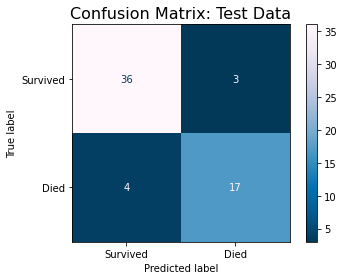

In [45]:
plot_confusion_matrix(rf_model_tuned, 
                      heart_test_set_processed, 
                      heart_test_labels, 
                      cmap = "PuBu_r",
                      display_labels = ["Survived", "Died"])
plt.title("Confusion Matrix: Test Data", fontsize = 16);

In [42]:
rf_model_tuned.feature_importances_

array([0.07246432, 0.06245681, 0.11256996, 0.06214477, 0.11772153,
       0.0498213 , 0.49835553, 0.00787879, 0.00373727, 0.00405457,
       0.00405454, 0.00474062])

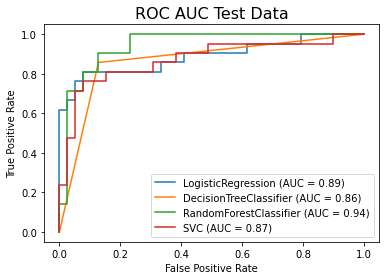

In [46]:
lr_plot = plot_roc_curve(lr_model, heart_test_set_processed, heart_test_labels)
plot_roc_curve(dt_model, heart_test_set_processed, heart_test_labels, ax=lr_plot.ax_)
plot_roc_curve(rf_model_tuned, heart_test_set_processed, heart_test_labels, ax=lr_plot.ax_)
plot_roc_curve(sv_model, heart_test_set_processed, heart_test_labels, ax=lr_plot.ax_)
plt.title("ROC AUC Test Data", fontsize = 16);
plt.show()